In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
training= pd.read_csv('C:/Users/DIARRA née CISSE Bal/Documents/python/training.csv',delimiter=';',names=["cancer code","sex","age","pays","ville","ethnie","year","incidence"],low_memory=False)
mortality= pd.read_csv('C:/Users/DIARRA née CISSE Bal/Documents/python/mortality.csv',delimiter=';',low_memory=False)
#,nrows=10000
#,nrows=100

In [5]:
print(training.head(5))
print(mortality.head(5))

      cancer code  sex  age       pays            ville ethnie  year  \
0  C00-96 but C44    1    1  Australia  New South Wales    NaN  1983   
1  C00-96 but C44    1    2  Australia  New South Wales    NaN  1983   
2  C00-96 but C44    1    3  Australia  New South Wales    NaN  1983   
3  C00-96 but C44    1    4  Australia  New South Wales    NaN  1983   
4  C00-96 but C44    1    5  Australia  New South Wales    NaN  1983   

   incidence  
0         47  
1         19  
2         29  
3         47  
4         97  
  Cancer code  sex(1 or 2)  Age bucket Location  year  Number of deaths
0         C80            2           1  Jamaica  2000                 2
1         C80            2           2  Jamaica  2000                 0
2         C80            2           3  Jamaica  2000                 1
3         C80            2           4  Jamaica  2000                 0
4         C80            2           5  Jamaica  2000                 0


In [6]:
training.shape
mortality.shape

(725795, 6)

In [7]:
training.describe(include='all')

,cancer code,sex,age,pays,ville,ethnie,year,incidence
count,16108276,16108276.0,1.610828e+07,16108276,13824780,4071776,1.610828e+07,1.610828e+07
unique,169,NaN,NaN,28,75,10,NaN,NaN
top,X71-72.7,NaN,NaN,USA,California,Black,NaN,NaN
freq,622972,NaN,NaN,4670162,1581940,1279308,NaN,NaN
mean,NaN,1.5,1.000000e+01,NaN,NaN,NaN,1.989770e+03,3.210022e+00
std,NaN,0.5,5.477226e+00,NaN,NaN,NaN,8.749258e+00,5.636241e+01
min,NaN,1.0,1.000000e+00,NaN,NaN,NaN,1.958000e+03,0.000000e+00
25%,NaN,1.0,5.000000e+00,NaN,NaN,NaN,1.984000e+03,0.000000e+00
50%,NaN,1.5,1.000000e+01,NaN,NaN,NaN,1.991000e+03,0.000000e+00
75%,NaN,2.0,1.500000e+01,NaN,NaN,NaN,1.997000e+03,0.000000e+00


In [86]:
mortality.describe(include='all')

,Cancer code,sex(1 or 2),Age bucket,Location,year,Number of deaths
count,725795,725795.000000,725795.000000,725795,725795.000000,725795.000000
unique,73,NaN,NaN,111,NaN,NaN
top,C16,NaN,NaN,Brazil,NaN,NaN
freq,17537,NaN,NaN,15599,NaN,NaN
mean,NaN,1.582753,9.999952,NaN,2000.598702,21.096632
std,NaN,0.867091,5.477216,NaN,2.584728,271.735428
min,NaN,1.000000,1.000000,NaN,1988.000000,0.000000
25%,NaN,1.000000,5.000000,NaN,1999.000000,0.000000
50%,NaN,2.000000,10.000000,NaN,2001.000000,0.000000
75%,NaN,2.000000,15.000000,NaN,2003.000000,3.000000


In [8]:
mortality['sex(1 or 2)']
training['ethnie'].value_counts()

Black                 1279308
White                 1072968
Chinese                378290
Jews                   275120
Malay                  240730
Non-Hispanic White     206340
Hispanic White         206340
Korean                 137560
Japanese               137560
Filipino               137560
Name: ethnie, dtype: int64

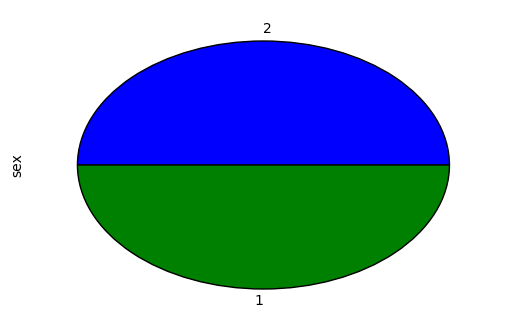

In [3]:
training['sex'].value_counts().plot.pie()

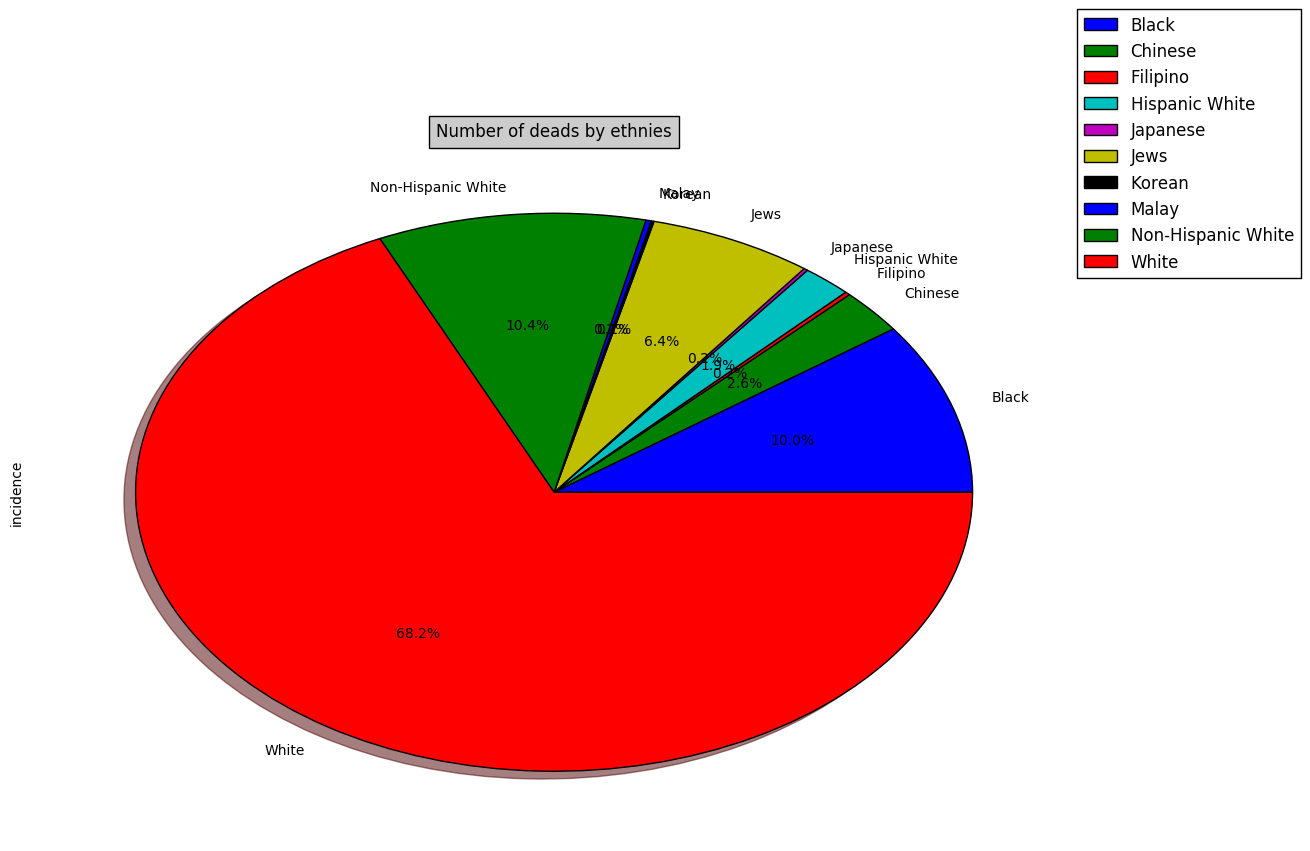

In [10]:
training_by_ethnie=training.groupby(['ethnie'])['incidence'].sum()
explode = (0, 0, 0, 0, 0,0,0,0,0,0)
training_by_ethnie.transpose().plot(kind='pie',figsize=(13.5, 9),autopct='%1.1f%%',shadow=True,explode=explode)
plt.legend(bbox_to_anchor=(1, 1), loc=6, borderaxespad=0.)
plt.title('Number of deads by ethnies', bbox={'facecolor':'0.8', 'pad':5})
#training['ethnie'].value_counts().plot.pie()

In [4]:
#training.hist(column='incidence',by='year')
#tweets_by_type = tweets.groupby(['source_new'])['followers_count'].sum()
training_by_cancer = training.groupby(['cancer code'])['incidence'].sum()

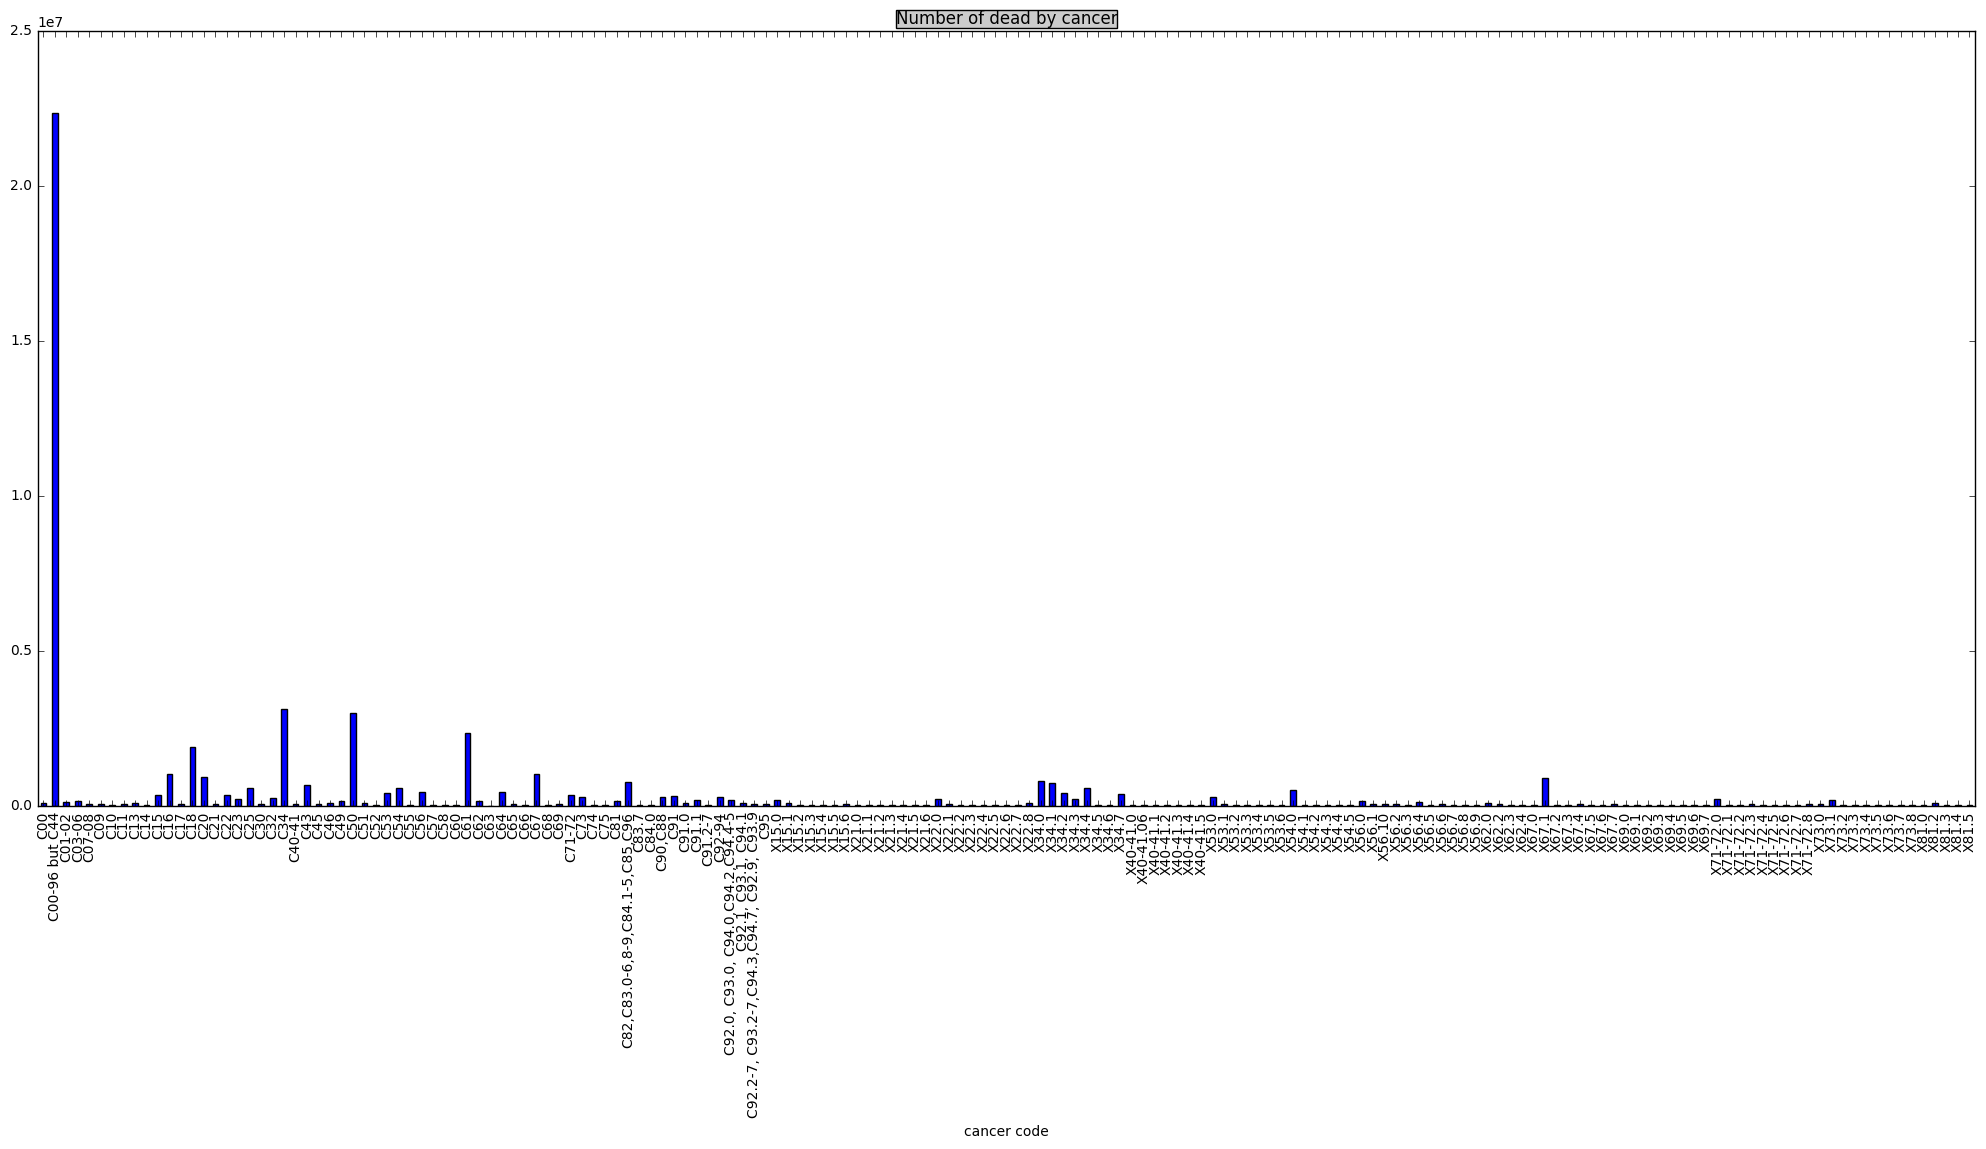

In [5]:
training_by_cancer.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of dead by cancer', bbox={'facecolor':'0.8', 'pad':0})

In [ ]:
training_by_country = training.groupby(['pays'])['cancer code'].sum()

In [ ]:
training_by_country.transpose().plot(kind='bar',figsize=(25, 10))
plt.title('Number of dead by cancer', bbox={'facecolor':'0.8', 'pad':0})

In [4]:
mortalite=pd.read_table('C:/Users/DIARRA née CISSE Bal/Documents/python/mortalite.txt',delimiter=';',low_memory=False)

In [5]:
mortalite.shape

(3191598, 8)

In [8]:
mortality.shape

(725795, 6)

In [10]:
training_new=pd.read_table('C:/Users/DIARRA née CISSE Bal/Documents/python/training.txt',delimiter=';')

C:\Users\DIARRA née CISSE Bal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
training_new.shape

(7749756, 8)

In [12]:
training.shape

(16108276, 8)